- 形態素解析結果をneko.txt.mecabに保存

In [1]:
import MeCab

m = MeCab.Tagger()
with open('./data/neko.txt') as text, open('./work/neko.txt.mecab', 'w') as out:
    for line in text:
        out.write(m.parse(line))

- 形態素解析ツール

MeCabめちゃめちゃ速い
辞書が作りやすい
JUMAN(++) ++の方はRNN使ってる、重い
構文・格・照応解析システム -> knp

# 30. 形態素解析結果の読み込み

- 正規表現は重いからstrに対してreplace,split使えるならその方が良い

In [3]:
#30 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．
# ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，
# 1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

import re
import itertools

def get_morphlist(data):
    
    with open(data, 'r') as d:
        ptn = re.compile(r'^(?P<surface>[^\*]*)\s(?P<pos>.*?),(?P<pos1>.*?),(?:.*?),(?:.*?),(?:.*?),(?:.*?),(?P<base>.*?)(?:,.*)?$', \
                        flags = re.MULTILINE)
        lines = []
        morphs = []
 
        for line in d:
            if not line.startswith('EOS'):
                lines.append(line)
            
            elif len(lines) > 0:
                sentence = "".join(lines)
                lines.clear()
                
                for match in ptn.finditer(sentence): 
                    morph = {}
                    morph['surface'] = match.group('surface')
                    morph['base'] = match.group('base')
                    morph['pos'] = match.group('pos')
            
                    pos1 = match.group('pos1')
                    morph['pos1'] = pos1
            
                    morphs.append(morph)
            
                yield morphs
                morphs.clear()
                
sentences = get_morphlist('./work/neko.txt.mecab')
for sentence in itertools.islice(sentences, 5):
    print(sentence)
    # 長いので5文だけ出力

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生

# 31. 動詞

In [5]:
#31 動詞の表層形をすべて抽出せよ．

import itertools

sentences = get_morphlist('./work/neko.txt.mecab') # ジェネレータオブジェクト(イテレータに呼ばれると要素を取ってくる)

for item in itertools.islice((word['surface'] for sentence in sentences for word in sentence if word['pos'] == '動詞'), 50):
    print(item)

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ
し
のみ
なら
し
いる
吹く
せ
弱っ
飲む
知っ
坐っ
おっ
する
し
始め
動く
動く
分ら
廻る
なる


# 32. 動詞の原形

In [6]:
#32 動詞の原形をすべて抽出せよ．

import itertools

sentences = get_morphlist('./work/neko.txt.mecab')

for item in itertools.islice((word['base'] for sentence in sentences for word in sentence if word['pos'] == '動詞'), 50):
    print(item)

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく
見る
見る
思う
残る
いる
する
れる
する
逢う
出会う
する
のむ
なる
する
いる
吹く
する
弱る
飲む
知る
坐る
おる
する
する
始める
動く
動く
分る
廻る
なる


# (2015ver.) 33. サ変名詞

In [5]:
#(33 サ変接続の名詞をすべて抽出せよ．)

sentences = get_morphlist('./work/neko.txt.mecab')

for i, item in enumerate((word['surface'] for sentence in sentences for word in sentence if word['pos1'] == 'サ変接続'), start = 1):
    print(item)
    if i >= 50: break

見当
記憶
話
装飾
突起
運転
記憶
分別
決心
我慢
餓死
訪問
始末
猶予
遭遇
我慢
記憶
返報
勉強
勉強
昼寝
珍重
昼寝
経験
供
供
供
供
——
——
同居
観察
断言
同衾
供
迫害
尊敬
生活
剿滅
議論
所有
憤慨
観念
御馳走
掠奪
代言
我儘
我儘
失敗
話


# 33. 「AのB」

マッチする数が少ないから名詞での条件処理よりも「の」の検索の方が速い / 可読性との相談

In [9]:
#33 2つの名詞が「の」で連結されている名詞句を抽出せよ．

import toolz.itertoolz

sentences = get_morphlist('./work/neko.txt.mecab')

count = 0
for w1, w2, w3 in toolz.itertoolz.sliding_window(3, (word for sentence in sentences for word in sentence)):
    if w1['pos'] == '名詞' and w2['pos'] == '助詞' and w2['surface'] == 'の' and w3['pos'] == '名詞':
        count += 1
        print(w1['surface'] + w2['surface'] + w3['surface'])
        
    if count >= 50: break

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
自分の住
吾輩の主人
家のもの
うちのもの
彼の書斎
本の上
皮膚の色
本の上
彼の毎夜
以外のもの
主人の傍
彼の膝
膝の上
経験の上
飯櫃の上
炬燵の上
ここのうち
供の寝床
彼等の中間
供の一


# 34. 名詞の連接

groupbyで名詞かどうかをgroupingすれば勝手に最長一致でとれる & simple

In [10]:
#34 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

import itertools

def concat(sentences):
    
    res = []
    
    for sentence in sentences:
        for word in sentence:
            if word['pos'] == '名詞':
                res.append(word['surface'])
            else:
                if len(res) >= 2:
                    yield "".join(res)
                res.clear()

sentences = get_morphlist('./work/neko.txt.mecab')

for res in itertools.islice(concat(sentences), 50):
    print(res)

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺


# 35. 単語の出現頻度

In [8]:
#35 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

from collections import Counter

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

for word in c.most_common(50):
    # 引数なしなら全部取ってこれる
    print(word)

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)
('で', 3806)
('「', 3231)
('」', 3225)
('も', 2479)
('ない', 2390)
('だ', 2363)
('し', 2322)
('から', 2032)
('ある', 1728)
('な', 1613)
('ん', 1568)
('か', 1530)
('いる', 1249)
('事', 1207)
('へ', 1034)
('う', 992)
('する', 992)
('もの', 981)
('君', 973)
('です', 973)
('云う', 937)
('主人', 932)
('よう', 696)
('ね', 683)
('この', 649)
('御', 636)
('ば', 617)
('人', 602)
('その', 576)
('一', 554)
('そう', 546)
('何', 539)
('なる', 531)
('さ', 514)
('よ', 509)
('なら', 483)
('吾輩', 481)
('い', 478)
('ます', 458)
('じゃ', 448)


In [9]:
%%timeit
#35 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

from collections import Counter

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

#for word in c.most_common(50):
    # 引数なしなら全部取ってこれる
    #print(word)

659 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- Counterオブジェクトの要素を更新するときはCounter.update()が結構速い

が内包表記の方が速い。

itertools.chain.from_iterable(for文を2回書かなくても中身をさらってこれる)
-> for word in chain.from_iterable(sentences)

In [11]:
#35 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

import itertools
from collections import Counter

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for word in itertools.chain.from_iterable(sentences))

for word in c.most_common(50):
    # 引数なしなら全部取ってこれる
    print(word)

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)
('で', 3806)
('「', 3231)
('」', 3225)
('も', 2479)
('ない', 2390)
('だ', 2363)
('し', 2322)
('から', 2032)
('ある', 1728)
('な', 1613)
('ん', 1568)
('か', 1530)
('いる', 1249)
('事', 1207)
('へ', 1034)
('う', 992)
('する', 992)
('もの', 981)
('君', 973)
('です', 973)
('云う', 937)
('主人', 932)
('よう', 696)
('ね', 683)
('この', 649)
('御', 636)
('ば', 617)
('人', 602)
('その', 576)
('一', 554)
('そう', 546)
('何', 539)
('なる', 531)
('さ', 514)
('よ', 509)
('なら', 483)
('吾輩', 481)
('い', 478)
('ます', 458)
('じゃ', 448)


- dict.get(key, default) -> 辞書に存在しないkeyでもデフォルト値を返してくれる
- Collections.defaultdict([]), defaultdict(int), (lambda : 0) = 引数なしの無名関数 = return 0、など -> これも存在しないkeyに対して指定した引数(default)を返す

# 36. 頻度上位10語

<BarContainer object of 10 artists>

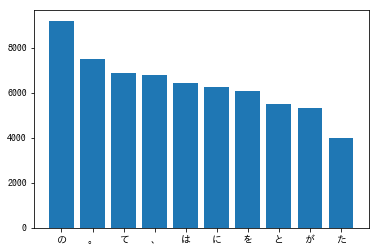

In [15]:
#36 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

left = np.arange(10)
height = np.array([])
xlabel = []
for word, freq in c.most_common(10):
    xlabel.append(word)
    # numpyのリストへのappendは引数にリストを取る
    height = np.append(height, freq)    

%matplotlib inline
mpl.rcParams['font.family'] = 'TakaoGothic' # 日本語が表示できるフォントに変更
# left:x軸の値とheight:棒の高さは必須の引数
plt.bar(left, height, tick_label = xlabel, align = 'center')

In [7]:
import matplotlib
matplotlib.get_cachedir()

'/Users/r-fujii/.matplotlib'

- pandasが便利

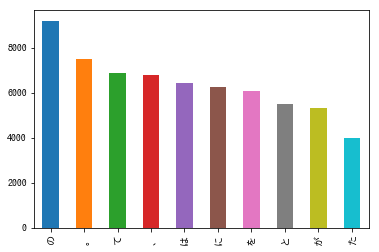

In [9]:
import pandas as pd

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

x, y = zip(*c.most_common(10))

series = pd.Series(y, index = x)
series.plot.bar()

# 37. 「猫」と共起頻度の高い上位10語

- 共起とは?

同じ文の中の出現? 文脈語(n-gram)?

文単位ならregexかなんかで一文取ってくればいいしbigramとなら単語のoverlap考えなくていいから楽そう

n-gramへの拡張 -> 直前のn-gramと(n - 1)語のoverlapをどう処理??

<BarContainer object of 10 artists>

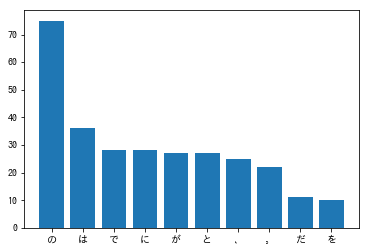

In [11]:
#37 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from toolz.itertoolz import sliding_window

sentences = get_morphlist('./work/neko.txt.mecab')

# 「猫」を含むbigramを返すジェネレータ
bigram = (x for x in (sliding_window(2, (word['surface'] for sentence in sentences for word in sentence))) if '猫' in x)
# 各bigramを見ていって「猫」ではない語を返すジェネレータ
# bigramならoverlapは考える必要がない
word_co = (word for x in bigram for word in x if not word == '猫')

# 以後36の流用
c = Counter(word_co)

left = np.arange(10)
height = np.array([])
xlabel = []
for word, freq in c.most_common(10):
    xlabel.append(word)
    height = np.append(height, freq)    

%matplotlib inline
mpl.rcParams['font.family'] = 'TakaoGothic'
plt.bar(left, height, tick_label = xlabel, align = 'center')

- cytoolzのsliding_windowの方が速い

# 38. ヒストグラム

(array([1.3539e+04, 2.0000e+01, 3.0000e+00, 4.0000e+00, 5.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <a list of 20 Patch objects>)

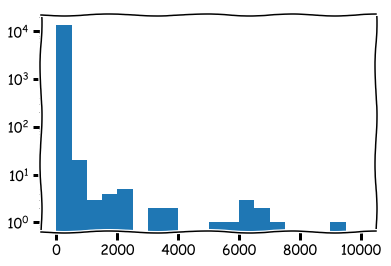

In [23]:
#38 単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

appearence = np.array([freq for word, freq in c.items()])

%matplotlib inline
plt.xkcd() # グラフ歪ませられる()
plt.hist(appearence, bins = 20, range = (0, 10000), log = True)

# 39. Zipfの法則

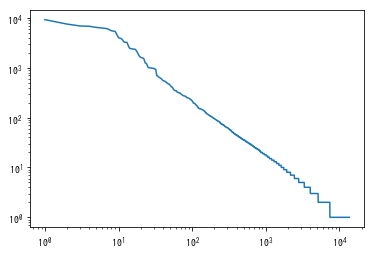

In [22]:
#39 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

sentences = get_morphlist('./work/neko.txt.mecab')
c = Counter(word['surface'] for sentence in sentences for word in sentence)

# 単語数をカウント
for i, _ in enumerate(c, start = 1): 
    pass

%matplotlib inline
plt.xscale('log')
plt.yscale('log')
x = np.arange(1, i + 1)
y = np.array([freq for word, freq in sorted(c.items(), key = lambda x : x[1], reverse = True)])
plt.plot(x, y)